In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# **Fractals: The Mathematical Beauty of Infinite Coplexity**

## **What are fractals?**
A fractal is a never-ending pattern. Fractals are infinitely complex patterns that are self-similar across different scales. They are created by repeating a simple process over and over in an ongoing feedback loop. Driven by recursion, fractals are images of dynamic systems – the pictures of Chaos. Geometrically, they exist in between our familiar dimensions.

## **Self-Similarity**  

Fractals are **self-similar**, meaning they look similar at different scales.  
A formal mathematical definition states that a set \( S \) is self-similar if:  
$$
S = \bigcup_{i=1}^{N} r_i S + d_i
$$ 
Here:  
- ( $r_i$ ): Scaling factor for each copy  
- ($ d_i $): Translation vector
- ($ N $): Number of smaller copies

## **Fractal Dimension**  
The **Hausdorff dimension** quantifies how a fractal scales differently from typical geometric shapes.  
For self-similar fractals, it can be calculated as:  
$$
D = \frac{\log(N)}{\log(\frac{1}{r})}
$$ 
Where:  
- ($ N $): Number of self-similar pieces  
- ($ r $): Scaling factor of each piece  

### **Example: Koch Snowflake Dimension:**
The Koch snowflake consists of four scaled-down copies of itself, each scaled by a factor of $ \frac{1}{3} $.  
$$
D = \frac{\log(4)}{\log(3)} \approx 1.2619
$$  
This means the Koch curve has a non-integer dimension, reflecting its complex structure.  

## **Fractal sets**
### **Mandelbrot Set** 
The Mandelbrot set is defined as the set of complex numbers $ ( c ) $ for which the function  
$$
f_c(z) = z^2 + c
$$ 
does not diverge when iterated from \( z = 0 \). 

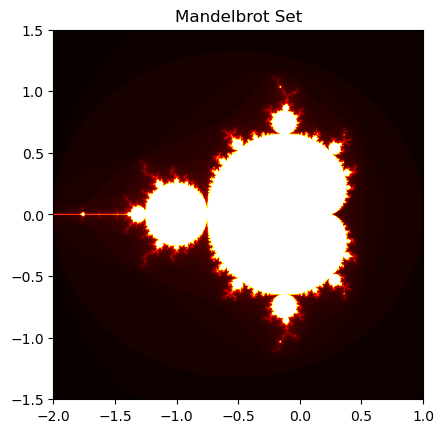

In [33]:
def mandelbrot(c, max_num):
    z = 0
    for n in range(max_num):
        if abs(z) > 2:
            return n
        z = z * z + c
    return max_num

width, height, max_num = 800, 800, 100
x_min, x_max = -2.0, 1.0
y_min, y_max = -1.5, 1.5

image = np.zeros((height, width))
for x in range(width):
    for y in range(height):
        real = x_min + (x / width) * (x_max - x_min)
        imag = y_min + (y / height) * (y_max - y_min)
        color = mandelbrot(complex(real, imag), max_num)
        image[y, x] = color

plt.imshow(image, cmap='hot', extent=(x_min, x_max, y_min, y_max))
plt.title('Mandelbrot Set')
plt.show()

## Julia Set  
The Julia set for a given complex number $( c ) $ is the set of complex numbers $( z_0 ) $ such that the sequence  
$$
z_{n+1} = z_n^2 + c
$$  
remains bounded. 

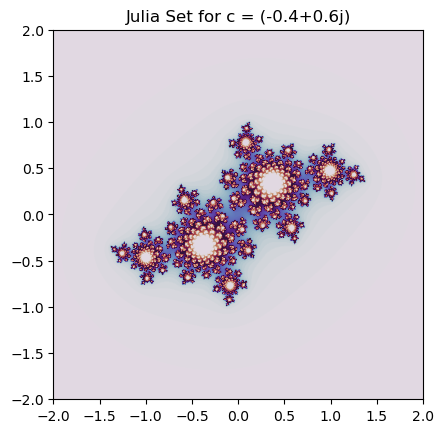

In [34]:
def julia(c, max_iter=100):
    x = np.linspace(-2, 2, 800)
    y = np.linspace(-2, 2, 800)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    output = np.zeros(Z.shape, dtype=int)

    for i in range(max_iter):
        mask = np.abs(Z) < 10
        Z[mask] = Z[mask] ** 2 + c
        output[mask] = i

    plt.imshow(output, cmap='twilight', extent=(-2, 2, -2, 2))
    plt.title(f'Julia Set for c = {c}')
    plt.show()

julia(complex(-0.4, 0.6))